<a href="https://colab.research.google.com/github/IvanPanashchenko/Data-science-homework/blob/main/%D0%94%D0%97_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 64)          65600     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6531 - accuracy: 0.8189
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3643 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3267 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3109 - accuracy: 0.8816
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2879 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2709 - accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2558 - accuracy: 0.9047
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2417 - accuracy: 0.9090
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2293 - accuracy: 0.9131
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - 

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4085 - accuracy: 0.8761


[0.4085266888141632, 0.8761000037193298]

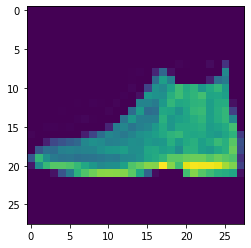

Ответ нейросети:  Ankle boot


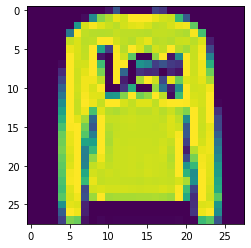

Ответ нейросети:  Pullover


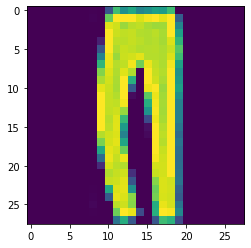

Ответ нейросети:  Trouser


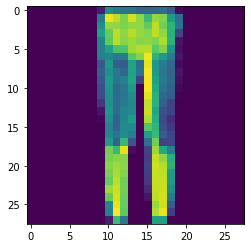

Ответ нейросети:  Trouser


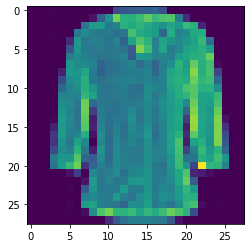

Ответ нейросети:  Shirt


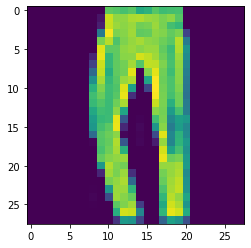

Ответ нейросети:  Trouser


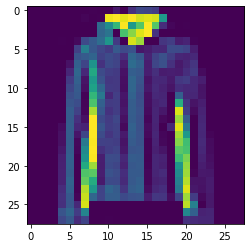

Ответ нейросети:  Coat


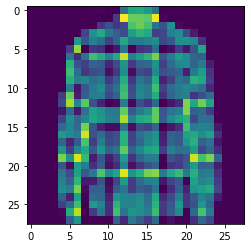

Ответ нейросети:  Shirt


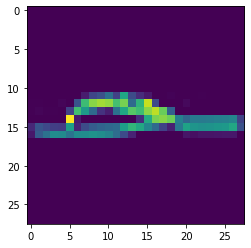

Ответ нейросети:  Sandal


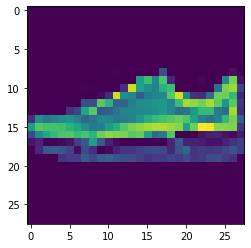

Ответ нейросети:  Sneaker


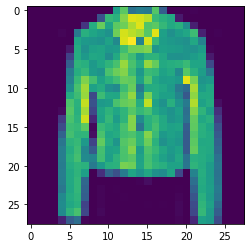

Ответ нейросети:  Coat


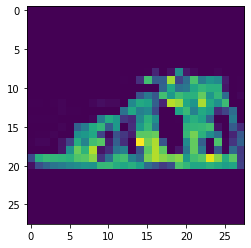

Ответ нейросети:  Sandal


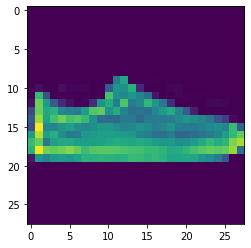

Ответ нейросети:  Sandal


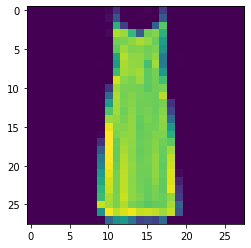

Ответ нейросети:  Dress


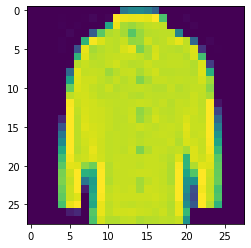

Ответ нейросети:  Coat


In [ ]:
predictions = model(x_test)

label_dictionnary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

for i in range(15):
    plt.imshow(np.reshape(x_test[i], [28, 28],))
    plt.show()
    print("Ответ нейросети: ", label_dictionnary[np.argmax(predictions.numpy()[i])])

In [ ]:
model.save('Fashion_mnist.h5')